# Intro to Neural Networks Assignment

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer: The layer that is exposed to the input. For example a Photo or array like object, input layer must have a neuron count equal to features in input data. 
### Hidden Layer: Hidden layers are inside the network and can only be acessed by the input data. The hidden layers of a NN perform their functions with only the input data. Multiple hidden layers makes Deep Learning a poissibility.
### Output Layer: The outcome of the network. Typically modified by an activation function to shape the output into the correct format for the model at hand.
### Neuron: Recieves input and gives output if a threshold is met.
### Weight: Typically given for each node, weights modify the input value by an amount of importance to influence the activation of the node. 
### Activation Function: The post processing of the output, helps shape the output to the correct format for the action needed. 
### Node Map: A typical inforgraphic to outline the layout of a network, itemizing: input , hidden and output layers as well as their function in the network
### Perceptron:A perceptron is a simple version of a neural net, It has a single neuron or node can take many inputs but has only a single output. 


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### A Tour of the wonderous Neural Net! 
    
    It all starts at the input layer where the neural net is exposed to the data you have at hand. The nodes of the input layer are arranged in such a way that each feature of the data you feed into the input layer has an individual node. For example if your data has 30 features you would have 30 nodes in the input layer of the neural network. Next up is the wieghts portion of the input layer. The weights adjust the feature based on the importance of that feature(think coefficient). This weight will affect the activation of the node. Then comes the hidden layers! In the hidden layers a bias is added in, This bias along with the weights will further influence the outcome of each node, Bias affects a single hidden layer but will influence all layers after. This will lead us to the output layer! Here we prepare to present the data after its transormation inside our network. The output will typically use an activation function to shapethe data into a useableform for modeling or consumption by the user. 

## Write your own perceptron code that can correctly classify a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [23]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [78]:
#start with column vectors 
#add bias vector for good measure x0 
    #x0  x1   x2
X = np.array([[0., 0.],
     [1., 0.],
     [0., 1.],
     [1., 1.]])
# outputs to match 
y = [1.,
    1.,
    1.,
    0.]
X = pd.DataFrame(X)

In [79]:
X.shape

(4, 2)

## Make a perceptron!!

* X : Features 
* Y : Outputs 
* Z : Threshold 
* Eta : Learning rate 
* Iters : Number of iterations 

In [91]:
class Perceptron(object):
    def __init__(self, rate=0.01, iters = 10):
        self.rate = rate 
        self.iters = iters 
        
    def fit(self, X, y):
        '''Fits the training data
        X =  Training Vectors 
        X.shape : [#samples , #features ]
        y = Target values 
        y.shape = [# samples]
        '''
        
        #initalize weights 
        self.weight = np.zeros(1 + X.shape[1])
        #initialize errors 
        self.errors = []
        
        #loop till iteration limit is met 
        for i in range (self.iters):
            errs = 0 
            # for every row of x and matching y 
            for xi, target in zip(X,y):
                #set delta weight equal to the predicted value of X 
                ##subtracted from the target value multiplied by the learning rate.
                delta_w = self.rate * (target - self.predict(xi))
                # Update the weights 
                self.weight[1:] += delta_w * xi
                self.weight[0] += delta_w
                # Update errors 
                errs += int(delta_w != 0.0)
            self.errors.append(errs)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.weight[1:]) + self.weight[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

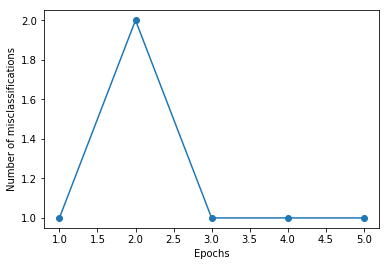

In [98]:
pn = Perceptron(0.01, 5)
pn.fit(X.values, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

## Implement your own Perceptron Class and use it to classify a binary dataset like: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 
- [Titanic](https://raw.githubusercontent.com/ryanleeallred/datasets/master/titanic.csv)
- [A two-class version of the Iris dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Iris.csv)

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [99]:
url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv'
diabetes = pd.read_csv(url)

In [101]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [102]:
X_1 = diabetes.drop(columns = 'Outcome' , axis = 1) 
y_1 = diabetes['Outcome']

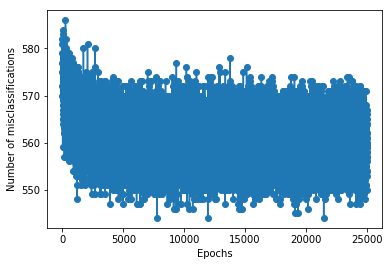

In [123]:
pn = Perceptron(0.0001, 25000)
pn.fit(X_1.values, y_1)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [118]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
  # setup marker generator and color map
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # plot the decision surface
  x1_min, x1_max = X[:,  0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
  np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  # plot class samples
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
    alpha=0.8, c=cmap(idx),
    marker=markers[idx], label=cl)

In [119]:
plot_decision_regions(X, y, classifier=pn)
plt.show()

TypeError: unhashable type: 'slice'

In [ ]:
!git commit --am 'complete'

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?